In [1]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_excel("Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.shape

(96, 2)

In [4]:
df.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.set_index('Month', inplace=True)#making the month column as index
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [7]:
df.index.year

Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
       1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
       1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
       2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
      dtype='int32', name='Month')

In [8]:
df.isnull().sum()

Passengers    0
dtype: int64

In [9]:
df[df.duplicated()].shape

(16, 1)

In [10]:
df[df.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(80, 1)

In [13]:
df1 = df.copy()

<Axes: xlabel='Month', ylabel='Passengers'>

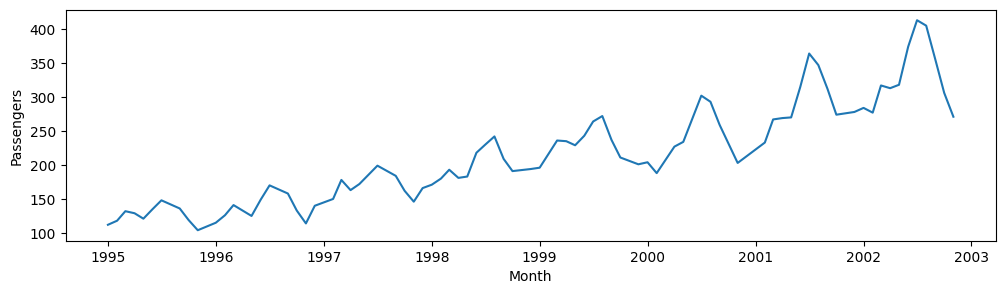

In [14]:
# Visulization
#lineplot
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Passengers",data=df1)

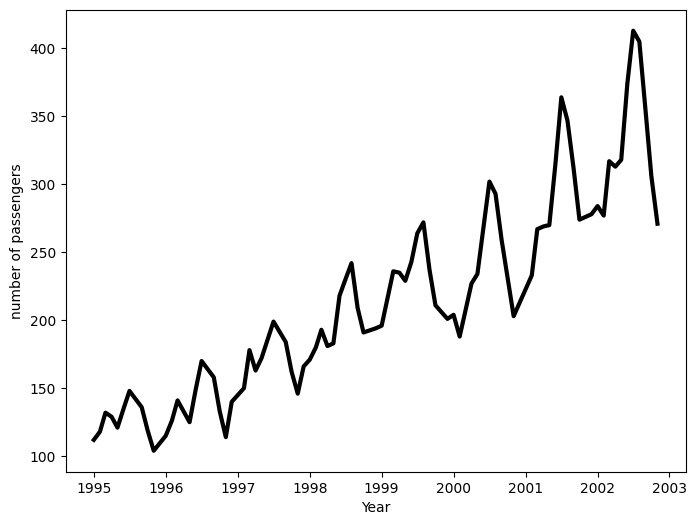

In [15]:
plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(df1['Passengers'], color = 'black', linewidth=3)
plt.xlabel('Year')
plt.ylabel("number of passengers")
plt.show()

<Axes: >

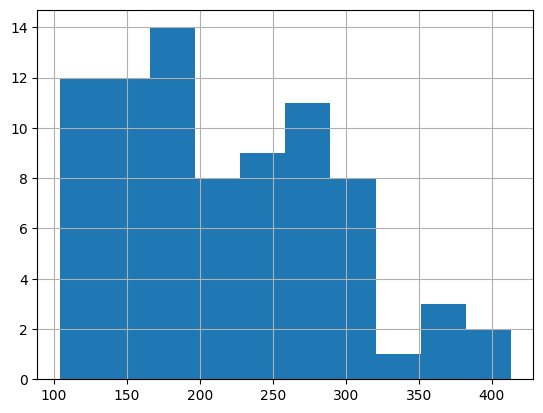

In [16]:
df1["Passengers"].hist()

<Axes: ylabel='Density'>

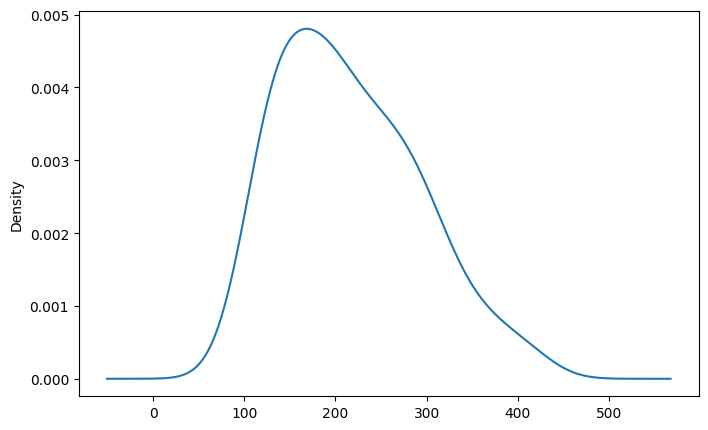

In [18]:

#density plot
ax =plt.axes()
ax.set_facecolor('white')
df1["Passengers"].plot(kind='kde',figsize=(8,5))

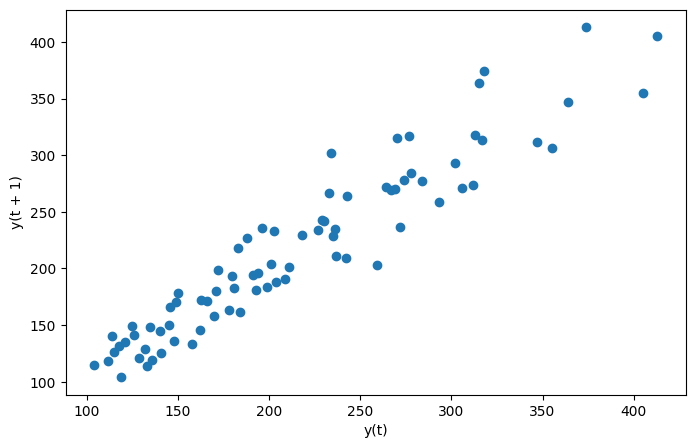

In [20]:
# Lagplot
from pandas.plotting import lag_plot
plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor("white")
lag_plot(df1['Passengers'])
plt.show()

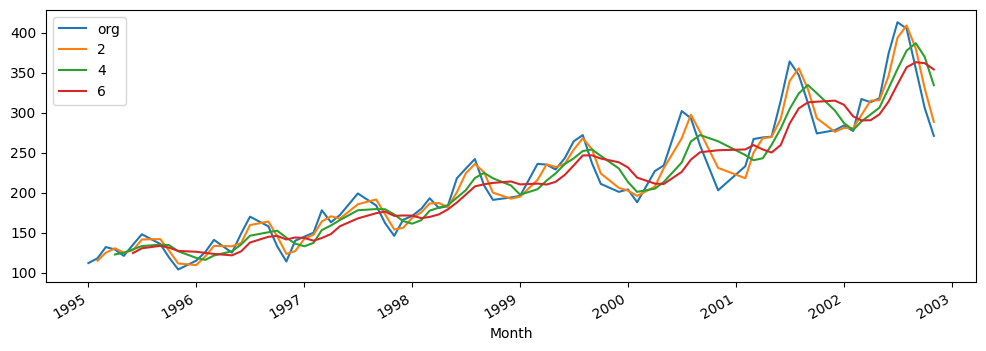

In [21]:
plt.figure(figsize=(12,4))
df1.Passengers.plot(label="org")
for i in range(2,8,2):
    df1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

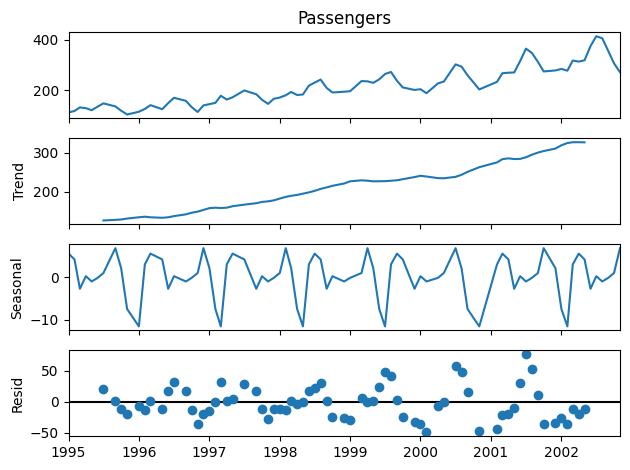

In [22]:
#Timeseries decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df1.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

<Axes: xlabel='Passengers'>

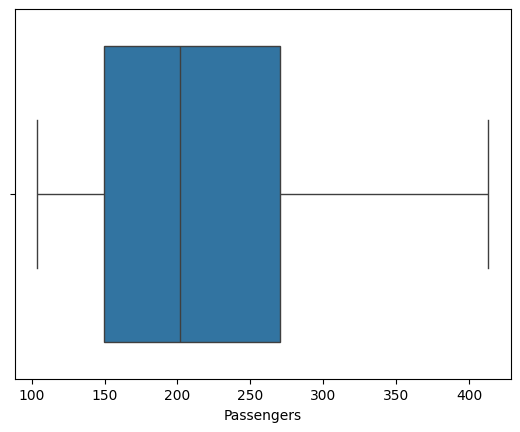

In [23]:
sns.boxplot(x = 'Passengers',data=df1)

In [24]:
#upsampling
upsampled = df1.resample('M').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30         NaN
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31         NaN
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30         NaN
1997-07-31       199.0
1997-08-31         NaN


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       109.5
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


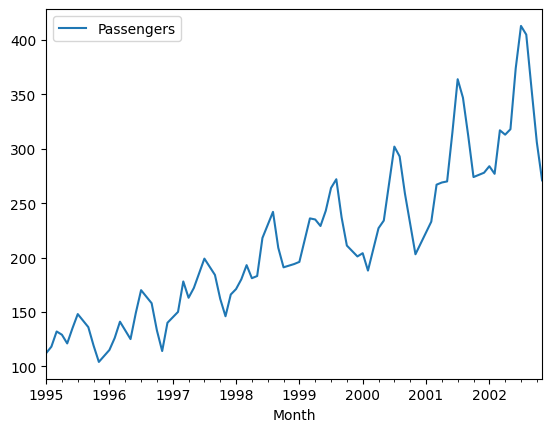

In [25]:
interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [26]:
Train = interpolated.head(81)
Test = interpolated.tail(14)


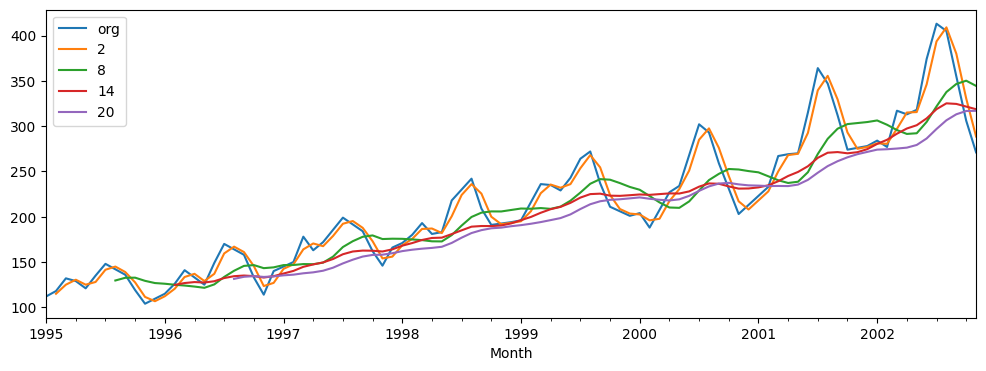

In [27]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [28]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [29]:
#forecasting models
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [30]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [31]:
#SimpleExp0nentialMethod
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


11.1816387243686

In [32]:
#Holt method
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

<ipython-input-32-3f08231830d9>:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


12.248038050026105

In [33]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

<ipython-input-33-12c2ab83f760>:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model


3.5137304889870413

In [34]:

#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

<ipython-input-34-27e34decb058>:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


3.2332633659559704

In [35]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

12.632692039692808

In [36]:
#Final Model by combining train and test
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()


In [37]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

2002-12-31    276.708394
2003-01-31    285.548725
2003-02-28    287.558773
2003-03-31    293.392525
2003-04-30    293.939351
2003-05-31    293.449050
2003-06-30    289.529979
2003-07-31    287.369390
2003-08-31    289.135747
2003-09-30    288.578869
Freq: M, dtype: float64

In [38]:
interpolated.reset_index(inplace=True)
interpolated['t'] = 1

In [39]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

<ipython-input-39-be507f051834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1
<ipython-input-39-be507f051834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1
<ipython-input-39-be507f051834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1
<ipython-input-39-be507f051834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [40]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # year extraction
interpolated

,Month,Passengers,t,month,year
0,1995-01-31,112.0,1,Jan,1995
1,1995-02-28,118.0,2,Feb,1995
2,1995-03-31,132.0,3,Mar,1995
3,1995-04-30,129.0,4,Apr,1995
4,1995-05-31,121.0,5,May,1995
...,...,...,...,...,...
90,2002-07-31,413.0,91,Jul,2002
91,2002-08-31,405.0,92,Aug,2002
92,2002-09-30,355.0,93,Sep,2002
93,2002-10-31,306.0,94,Oct,2002


In [41]:
months = pd.get_dummies(interpolated['month']) ## converting the dummy variables for month column
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
90,False,False,False,False,False,True,False,False,False,False,False,False
91,False,True,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,True
93,False,False,False,False,False,False,False,False,False,False,True,False


In [42]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']] # storing the months as serial wise again in months variable


In [43]:
airdata = pd.concat([interpolated,months],axis=1)
airdata.head()

,Month,Passengers,t,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,Jan,1995,True,False,False,False,False,False,False,False,False,False,False,False
1,1995-02-28,118.0,2,Feb,1995,False,True,False,False,False,False,False,False,False,False,False,False
2,1995-03-31,132.0,3,Mar,1995,False,False,True,False,False,False,False,False,False,False,False,False
3,1995-04-30,129.0,4,Apr,1995,False,False,False,True,False,False,False,False,False,False,False,False
4,1995-05-31,121.0,5,May,1995,False,False,False,False,True,False,False,False,False,False,False,False


In [44]:
airdata['log_passengers'] = np.log(airdata['Passengers'])
airdata

,Month,Passengers,t,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,Jan,1995,True,False,False,False,False,False,False,False,False,False,False,False,4.718499
1,1995-02-28,118.0,2,Feb,1995,False,True,False,False,False,False,False,False,False,False,False,False,4.770685
2,1995-03-31,132.0,3,Mar,1995,False,False,True,False,False,False,False,False,False,False,False,False,4.882802
3,1995-04-30,129.0,4,Apr,1995,False,False,False,True,False,False,False,False,False,False,False,False,4.859812
4,1995-05-31,121.0,5,May,1995,False,False,False,False,True,False,False,False,False,False,False,False,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,Jul,2002,False,False,False,False,False,False,True,False,False,False,False,False,6.023448
91,2002-08-31,405.0,92,Aug,2002,False,False,False,False,False,False,False,True,False,False,False,False,6.003887
92,2002-09-30,355.0,93,Sep,2002,False,False,False,False,False,False,False,False,True,False,False,False,5.872118
93,2002-10-31,306.0,94,Oct,2002,False,False,False,False,False,False,False,False,False,True,False,False,5.723585


<Axes: xlabel='month', ylabel='year'>

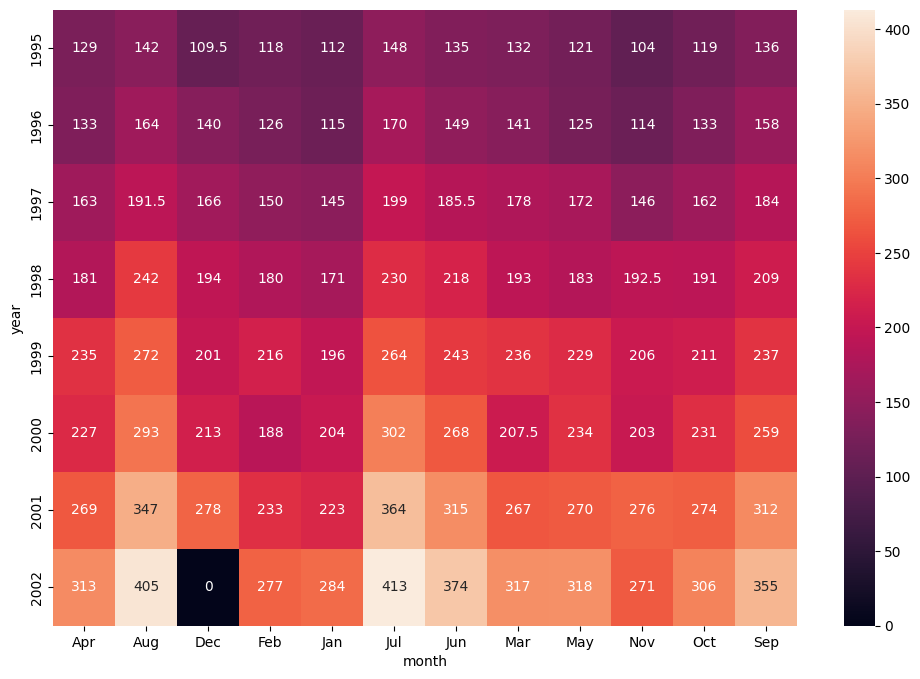

In [45]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airdata,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<Axes: xlabel='month', ylabel='Passengers'>

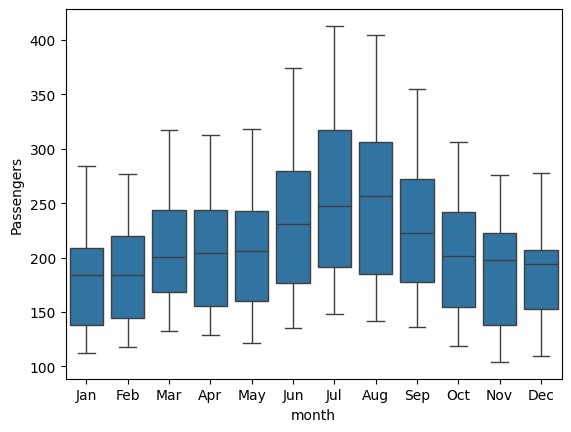

In [46]:
sns.boxplot(x="month",y="Passengers",data= airdata)

<Axes: xlabel='year', ylabel='Passengers'>

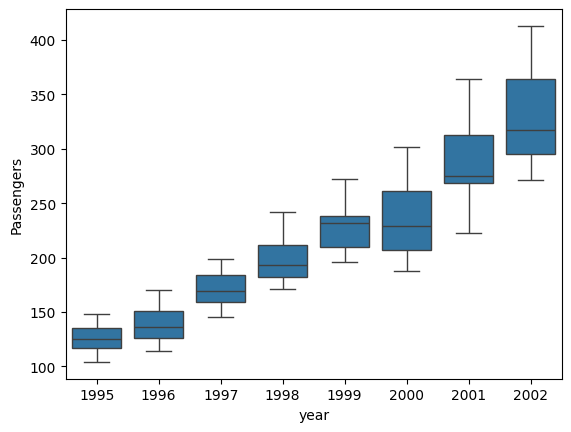

In [47]:
sns.boxplot(x="year",y="Passengers",data= airdata)

<Axes: xlabel='year', ylabel='Passengers'>

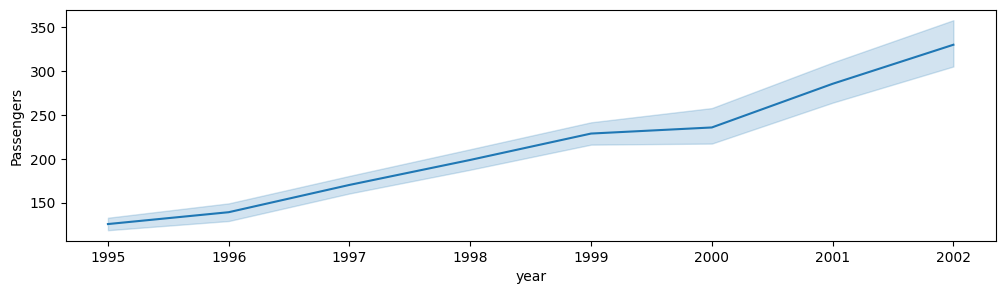

In [48]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airdata)

In [49]:
Train = airdata.head(81)
Test = airdata.tail(14)

In [50]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [51]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear =RMSE(Test['Passengers'], pred_linear)
rmse_linear

47.87107195088719

In [52]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp

42.37179623821826

In [60]:


# Create t_sq by squaring the 't' variable
Test['t_sq'] = Test['t'] ** 2


<ipython-input-60-a41da2fef283>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['t_sq'] = Test['t'] ** 2


In [61]:
#Quadratic
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad

42.709870425152005

In [62]:
#Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = RMSE(Test['Passengers'], pred_add_sea)
rmse_add_sea

130.5576238860141

In [63]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = RMSE(Test['Passengers'], pred_add_sea_quad)
rmse_add_sea_quad

26.78537191154033

In [64]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = RMSE(Test['Passengers'], np.exp(pred_Mult_sea))
rmse_Mult_sea


137.28596175917133

In [65]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = RMSE(Test['Passengers'], np.exp(pred_Mult_add_sea))
rmse_Mult_add_sea

13.188070730264725

In [66]:
#Comparing the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962


### #rmse_mult_add_sea is prefered than any other models in this analysis

In [77]:
# Building the model on entire data set
#final data
df.rename(columns={'Month':'Date'},inplace = True)
df


,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [78]:
df['year'] = df.Date.dt.strftime('%Y')
df['month'] = df.Date.dt.strftime('%b')
df['date'] = df.Date.dt.strftime('%d')
df

,Date,Passengers,year,month,date
0,1995-01-01,112,1995,Jan,01
1,1995-02-01,118,1995,Feb,01
2,1995-03-01,132,1995,Mar,01
3,1995-04-01,129,1995,Apr,01
4,1995-05-01,121,1995,May,01
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01
92,2002-09-01,355,2002,Sep,01
93,2002-10-01,306,2002,Oct,01
94,2002-11-01,271,2002,Nov,01


In [79]:
df['t']= np.arange(0,96)
df['t_square'] = df['t']*df['t']
df['log_passanger'] = np.log(df['Passengers'])

In [80]:
month_dummies = pd.get_dummies(df['month'])
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,True,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,True
93,False,False,False,False,False,False,False,False,False,False,True,False
94,False,False,False,False,False,False,False,False,False,True,False,False


In [81]:
airline = pd.concat([df,month_dummies] ,axis = 1)
airline

,Date,Passengers,year,month,date,t,t_square,log_passanger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,4.718499,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,1995,Feb,01,1,1,4.770685,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,1995,Mar,01,2,4,4.882802,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,1995,Apr,01,3,9,4.859812,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,1995,May,01,4,16,4.795791,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887,False,True,False,False,False,False,False,False,False,False,False,False
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118,False,False,False,False,False,False,False,False,False,False,False,True
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585,False,False,False,False,False,False,False,False,False,False,True,False
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119,False,False,False,False,False,False,False,False,False,True,False,False


choosing "Multiplicative Additive seosanality" (mult_add_sea)

In [82]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [83]:
t_square = t*t
t_square

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [84]:
month = pd.date_range(start='1/1/2003',end='11/1/2003',freq='MS')
month

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [85]:
Month = pd.DataFrame(month,columns=['Date'])
Month

,Date
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01
5,2003-06-01
6,2003-07-01
7,2003-08-01
8,2003-09-01
9,2003-10-01


In [86]:
df_1 = {'t':t,'t_square': t_square}
value = pd.DataFrame(df_1)
value

,t,t_square
0,97,9409
1,98,9604
2,99,9801
3,100,10000
4,101,10201
5,102,10404
6,103,10609
7,104,10816
8,105,11025
9,106,11236


In [87]:
data = pd.concat([Month,value],axis = 1)
data

,Date,t,t_square
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [88]:
data['year'] = data.Date.dt.strftime('%Y')
data['month'] = data.Date.dt.strftime('%b')
data['day'] = data.Date.dt.strftime('%d')
data

,Date,t,t_square,year,month,day
0,2003-01-01,97,9409,2003,Jan,01
1,2003-02-01,98,9604,2003,Feb,01
2,2003-03-01,99,9801,2003,Mar,01
3,2003-04-01,100,10000,2003,Apr,01
4,2003-05-01,101,10201,2003,May,01
5,2003-06-01,102,10404,2003,Jun,01
6,2003-07-01,103,10609,2003,Jul,01
7,2003-08-01,104,10816,2003,Aug,01
8,2003-09-01,105,11025,2003,Sep,01
9,2003-10-01,106,11236,2003,Oct,01


In [89]:
month_dummy = pd.get_dummies(data['month'])
month_dummy

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False
6,False,False,False,False,True,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,True,False


In [90]:
final_data = pd.concat([data,month_dummy],axis = 1)
final_data.head()

,Date,t,t_square,year,month,day,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,97,9409,2003,Jan,01,False,False,False,True,False,False,False,False,False,False,False
1,2003-02-01,98,9604,2003,Feb,01,False,False,True,False,False,False,False,False,False,False,False
2,2003-03-01,99,9801,2003,Mar,01,False,False,False,False,False,False,True,False,False,False,False
3,2003-04-01,100,10000,2003,Apr,01,True,False,False,False,False,False,False,False,False,False,False
4,2003-05-01,101,10201,2003,May,01,False,False,False,False,False,False,False,True,False,False,False


In [91]:
pred_final = Mul_Add_sea.predict(final_data)
pred_final

0     5.755734
1     5.796889
2     5.909593
3     5.889508
4     5.881922
5     6.008328
6     6.107547
7     6.091389
8     6.000759
9     5.873278
10    5.783571
dtype: float64

In [92]:
x = np.exp(pred_final)

In [93]:
pred_final = pd.DataFrame(x,columns=['pred_final'])
pred_final

,pred_final
0,315.997357
1,329.273441
2,368.556048
3,361.227615
4,358.497521
5,406.802480
6,449.235264
7,442.034827
8,403.735144
9,355.412167


In [94]:
pred_data = pd.concat([final_data,round(pred_final)],axis=1)
pred_data

,Date,t,t_square,year,month,day,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,pred_final
0,2003-01-01,97,9409,2003,Jan,01,False,False,False,True,False,False,False,False,False,False,False,316.0
1,2003-02-01,98,9604,2003,Feb,01,False,False,True,False,False,False,False,False,False,False,False,329.0
2,2003-03-01,99,9801,2003,Mar,01,False,False,False,False,False,False,True,False,False,False,False,369.0
3,2003-04-01,100,10000,2003,Apr,01,True,False,False,False,False,False,False,False,False,False,False,361.0
4,2003-05-01,101,10201,2003,May,01,False,False,False,False,False,False,False,True,False,False,False,358.0
5,2003-06-01,102,10404,2003,Jun,01,False,False,False,False,False,True,False,False,False,False,False,407.0
6,2003-07-01,103,10609,2003,Jul,01,False,False,False,False,True,False,False,False,False,False,False,449.0
7,2003-08-01,104,10816,2003,Aug,01,False,True,False,False,False,False,False,False,False,False,False,442.0
8,2003-09-01,105,11025,2003,Sep,01,False,False,False,False,False,False,False,False,False,False,True,404.0
9,2003-10-01,106,11236,2003,Oct,01,False,False,False,False,False,False,False,False,False,True,False,355.0


### #Total dummies created are  12 and RMSE score of Multiplicative Additive Seasonality is lower compared to other models.